# Trabalho 2
### SME0202 - Métodos Numéricos para Equações Diferenciais
##### Aluno: Caio Assumpção Rezzadori
##### Nº USP: 11810481

Queremos resolver $u_t = u_{xx}$, para $0\leq x \leq 1$

Com $u(0, t) = u(1, t) = 0$, para $t>0$ e

$u(x, 0) = 2x$ para $0 \leq x \leq 1/2$ e

$u(x, 0) = 2 - 2x$ para $1/2 \leq x \leq 1$

A solução analítica é dada por:

$u(x,t) = \dfrac{8}{\pi^2}\sum_{n = 1} ^\infty \dfrac{1}{n^2}\sin(\dfrac{1}{2}n\pi)\sin(n\pi x)\exp(-n^2\pi^2t)$

In [111]:
#Importando bibliotecas utilizadas
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.sparse import linalg


In [112]:
#Solução analítica do problema
def u_analitica(x, t, lim_sum):
    aux = 0
    for n in range (1, lim_sum + 1):
        aux += np.sin(n*np.pi/2)*np.sin(n*np.pi*x)*np.exp(-(n**2)*(np.pi**2)*t)/(n**2)
    
    return(8*aux/(np.pi**2))

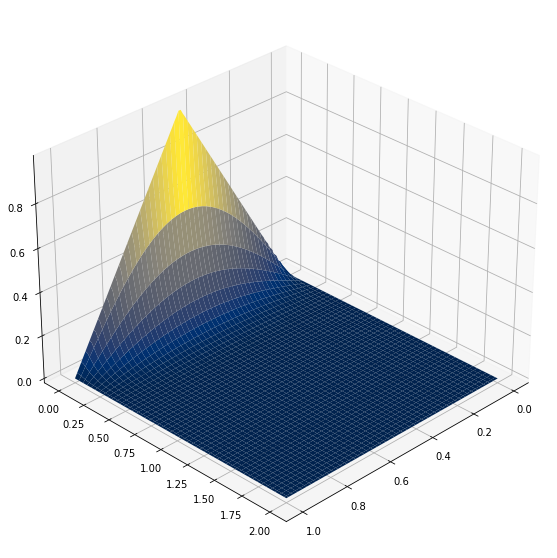

In [113]:
#Plotando gráfico da função para avaliar comportamento
x = np.linspace(0, 1, 100)
t = np.linspace(0,2, 100)

X, T = np.meshgrid(x, t)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
ax.view_init(30, 45)

ax.plot_surface(X, T, u_analitica(X, T, 100), cmap = 'cividis')

## Implementações dos métodos e das matrizes dos erros

### Método explícito

In [114]:
def U_explicito(h, k , lim_t):
    sigma = k/(h**2)

    #A matriz da solução não contará com a borda do domínio
    m = int(1/h - 1)
    m_linha = int(lim_t/k - 1)

    T = np.zeros((m,m))
    for i in range(0, m - 1):
        T[i][i + 1] = sigma
        T[i][i] = 1 - 2*sigma
        T[i + 1][i] = sigma
    T[-1][-1] = 1 - 2*sigma

    U_0 = np.zeros((m, 1))
    for j in range(0, m):
        if(j <= 1/(2*h)):
            U_0[j][0] = 2*j*h
        elif(j <= 1/h):
            U_0[j][0] = 2 - 2*j*h

    U = []
    U.append(U_0)

    for i in range(1, m_linha + 1):
        aux = np.dot(T, U[i-1]) 
        U.append(aux)

    U = np.array(U)
    U.shape = (U.shape[0], U.shape[1])
    
    return U

In [115]:
def erro_explicito(h, k, lim_t, lim_sum):
   
    x = np.arange(h, 1 , h)
    t = np.arange(k, lim_t, k)
    X, T = np.meshgrid(x, t)

    erro = abs(u_analitica(X, T, lim_sum) - U_explicito(h, k , lim_t))
    return erro

### Crank-Nicolson

In [116]:
def U_cn(h, k , lim_t):
    sigma = k/(h**2)

    #A matriz da solução não contará com a borda do domínio
    m = int(1/h - 1)
    
    #Condições para correção de erros ocorridos por problemas de arredondamento 
    #de máquina para valores específicos de k utilizados na verificação da ordem de convergência
    if((k == h) | (k == 0.5**2) | (k == 0.01**2)):
        m_linha = int(lim_t/k - 2)
    else:
        m_linha = int(lim_t/k - 1)
        
    T = np.zeros((m,m))
    for i in range(0, m - 1):
        T[i][i + 1] = -sigma/2
        T[i][i] = 1 + sigma
        T[i + 1][i] = -sigma/2
    T[-1][-1] = 1 + sigma

    S = np.zeros((m,m))
    for i in range(0, m - 1):
        S[i][i + 1] = sigma/2
        S[i][i] = 1 - sigma
        S[i + 1][i] = sigma/2
    S[-1][-1] = 1 - sigma
    
    U_0 = np.zeros((m, 1))
    for j in range(0, m):
        if(j <= 1/(2*h)):
            U_0[j][0] = 2*j*h
        elif(j <= 1/h):
            U_0[j][0] = 2 - 2*j*h
    
    U = []
    U.append(U_0)

    for i in range(1, m_linha + 1):
        aux = np.dot(S, U[i - 1])
        
        aux2 = np.linalg.solve(T, aux)
        U.append(aux2)
    
    U = np.array(U)
    U.shape = (U.shape[0], U.shape[1])

    return U

In [117]:
def erro_cn (h, k, lim_t, lim_sum):
    x = np.arange(h, 1 , h)
    t = np.arange(k, lim_t, k)
    X, T = np.meshgrid(x, t)
    erro = abs(u_analitica(X, T, lim_sum)- U_cn(h, k , lim_t))
    return erro

## Parte 1: Resolver o problema com $h = 0.05$ e:

### a) $k = \dfrac{5}{11}h^2$

#### Método explícito

In [118]:
#Condições iniciais
h = 0.05
k = (5/11)*(h**2)
lim_t = 2
lim_sum = 1000

#Solução numérica
U = U_explicito(h, k, lim_t)
U

array([[0.00000000e+00, 1.00000000e-01, 2.00000000e-01, ...,
        4.00000000e-01, 3.00000000e-01, 2.00000000e-01],
       [4.54545455e-02, 1.00000000e-01, 2.00000000e-01, ...,
        4.00000000e-01, 3.00000000e-01, 1.54545455e-01],
       [4.95867769e-02, 1.20661157e-01, 2.00000000e-01, ...,
        4.00000000e-01, 2.79338843e-01, 1.50413223e-01],
       ...,
       [3.27292096e-10, 6.46525175e-10, 9.49838658e-10, ...,
        9.49838658e-10, 6.46525175e-10, 3.27292096e-10],
       [3.23628906e-10, 6.39288995e-10, 9.39207667e-10, ...,
        9.39207667e-10, 6.39288995e-10, 3.23628906e-10],
       [3.20006717e-10, 6.32133806e-10, 9.28695663e-10, ...,
        9.28695663e-10, 6.32133806e-10, 3.20006717e-10]])

Text(0.5, 0, 'U')

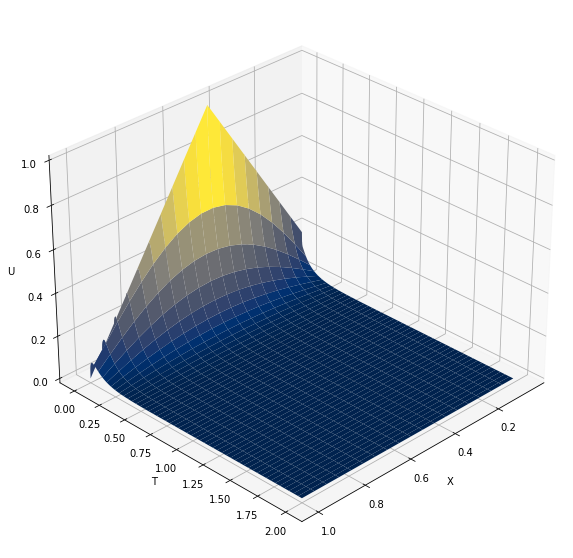

In [119]:
#Plotagem 3D da solução numérica
m = int(1/h - 1)
m_linha = int(lim_t/k)

x = np.arange(0, m)
t = np.arange(0, m_linha )

X, T = np.meshgrid(x,t)

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')

ax.plot_surface((-X + m)/m, (T*lim_t)/m_linha , U.flatten()[T*m + X], cmap = 'cividis')
ax.view_init(30, 45)
ax.set_xlabel('X')
ax.set_ylabel('T')
ax.set_zlabel('U')

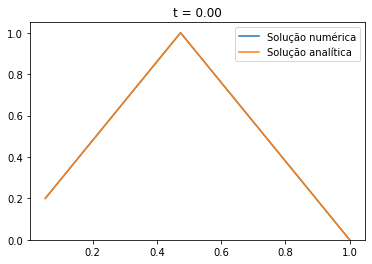

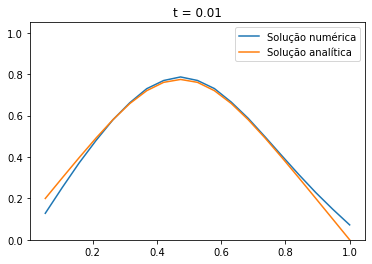

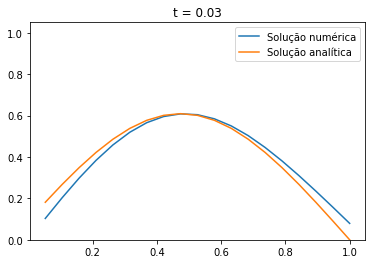

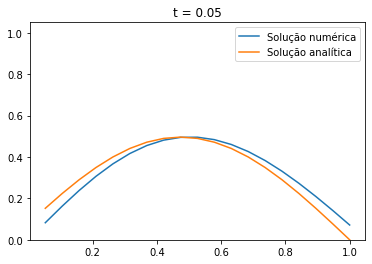

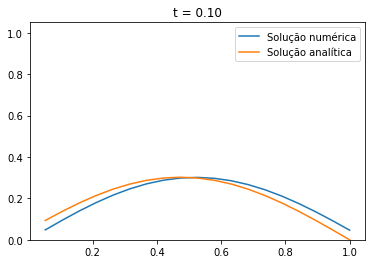

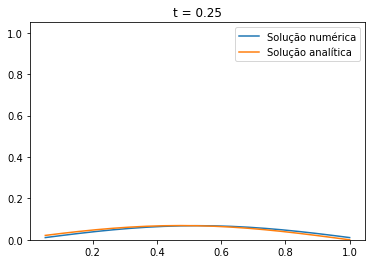

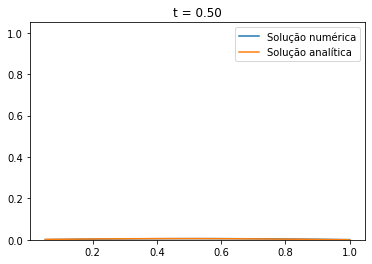

In [120]:
#Comparação da solução analítica com a solução numérica
m = int(1/h - 1)
m_linha = int(lim_t/k)
x = np.arange(0, m)

for i in [0, 0.01, 0.03, 0.05, 0.1, 0.25, 0.5]:
    u = u_analitica(x*h, i, lim_sum).flatten()
    
    fig, ax = plt.subplots()
    ax.plot((-x + m)/m, U.flatten()[int(i/k)*m + x])
    ax.plot((-x + m)/m, u[x])
    plt.title("t = %.2f" %i)
    ax.set_ylim([0, 1.05])    
    plt.legend(['Solução numérica', 'Solução analítica'])
    plt.show()


#### Crank-Nicolson

In [121]:
#Condições iniciais
h = 0.05
k = (5/11)*(h**2)
lim_t = 2
lim_sum = 100

#Solução numérica
U = U_cn(h, k, lim_t)
U

array([[0.00000000e+00, 1.00000000e-01, 2.00000000e-01, ...,
        4.00000000e-01, 3.00000000e-01, 2.00000000e-01],
       [3.20526331e-02, 1.05136852e-01, 2.00823220e-01, ...,
        3.99175636e-01, 2.94862965e-01, 1.67947338e-01],
       [4.63959751e-02, 1.14871069e-01, 2.03574568e-01, ...,
        3.96413677e-01, 2.85126784e-01, 1.53603650e-01],
       ...,
       [3.65571813e-10, 7.22142035e-10, 1.06093072e-09, ...,
        1.06093072e-09, 7.22142035e-10, 3.65571813e-10],
       [3.61502951e-10, 7.14104499e-10, 1.04912242e-09, ...,
        1.04912242e-09, 7.14104499e-10, 3.61502951e-10],
       [3.57479376e-10, 7.06156422e-10, 1.03744555e-09, ...,
        1.03744555e-09, 7.06156422e-10, 3.57479376e-10]])

Text(0.5, 0, 'U')

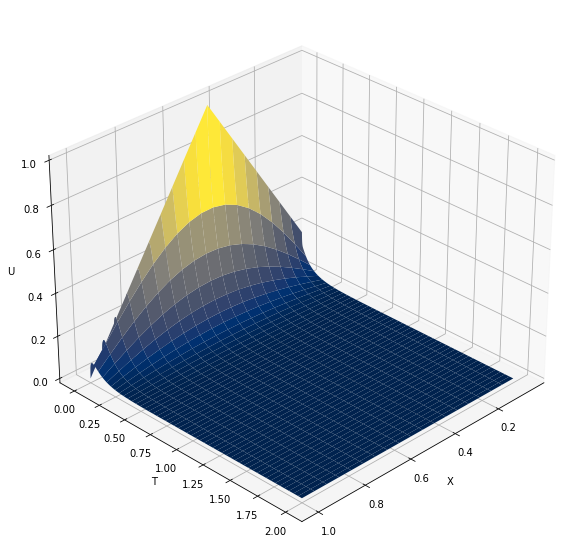

In [122]:
#Plotagem 3D da solução numérica
m = int(1/h - 1)
m_linha = int(lim_t/k)

x = np.arange(0, m)
t = np.arange(0, m_linha )

X, T = np.meshgrid(x,t)

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')

ax.plot_surface((-X + m)/m, (T*lim_t)/m_linha , U.flatten()[T*m + X], cmap = 'cividis')

ax.view_init(30, 45)
ax.set_xlabel('X')
ax.set_ylabel('T')
ax.set_zlabel('U')

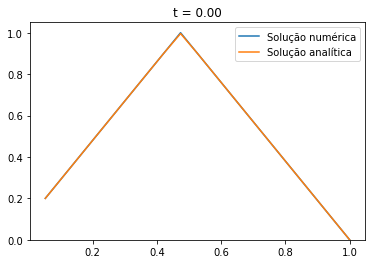

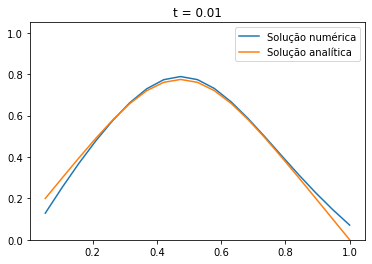

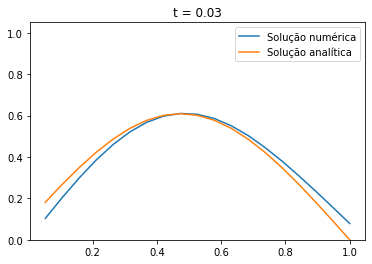

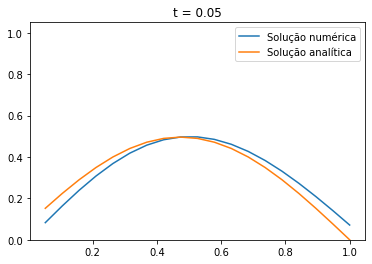

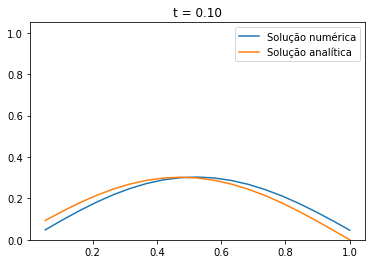

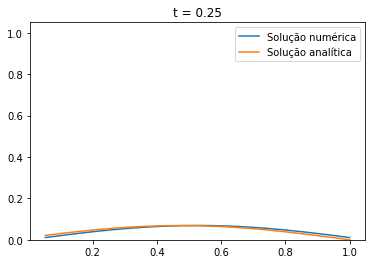

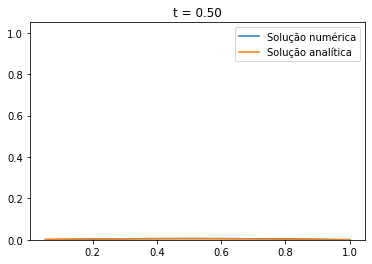

In [123]:
#Comparação da solução analítica com a solução numérica
m = int(1/h - 1)
m_linha = int(lim_t/k)
x = np.arange(0, m)

for i in [0, 0.01, 0.03, 0.05, 0.1, 0.25, 0.5]:
    u = u_analitica(x*h, i, lim_sum).flatten()
    
    fig, ax = plt.subplots()
    ax.plot((-x + m)/m, U.flatten()[int(i/k)*m + x])
    ax.plot((-x + m)/m, u[x])
    t = i
    plt.title("t = %.2f" %t)
    ax.set_ylim([0, 1.05])    
    plt.legend(['Solução numérica', 'Solução analítica'])
    plt.show()


### b) $k = \dfrac{5}{9}h^2$

#### Método explícito

In [124]:
#Condições iniciais
h = 0.05
k = (5/9)*(h**2)
lim_t = 2
lim_sum = 1000

#Solução numérica
U = U_explicito(h, k, lim_t)
U

array([[ 0.00000000e+000,  1.00000000e-001,  2.00000000e-001, ...,
         4.00000000e-001,  3.00000000e-001,  2.00000000e-001],
       [ 5.55555556e-002,  1.00000000e-001,  2.00000000e-001, ...,
         4.00000000e-001,  3.00000000e-001,  1.44444444e-001],
       [ 4.93827160e-002,  1.30864198e-001,  2.00000000e-001, ...,
         4.00000000e-001,  2.69135802e-001,  1.50617284e-001],
       ...,
       [ 1.04420072e+115, -2.06268976e+115,  3.03038853e+115, ...,
         3.03038853e+115, -2.06268976e+115,  1.04420072e+115],
       [-1.26196106e+115,  2.49284845e+115, -3.66235363e+115, ...,
        -3.66235363e+115,  2.49284845e+115, -1.26196106e+115],
       [ 1.52513370e+115, -3.01271354e+115,  4.42611038e+115, ...,
         4.42611038e+115, -3.01271354e+115,  1.52513370e+115]])

Text(0.5, 0, 'U')

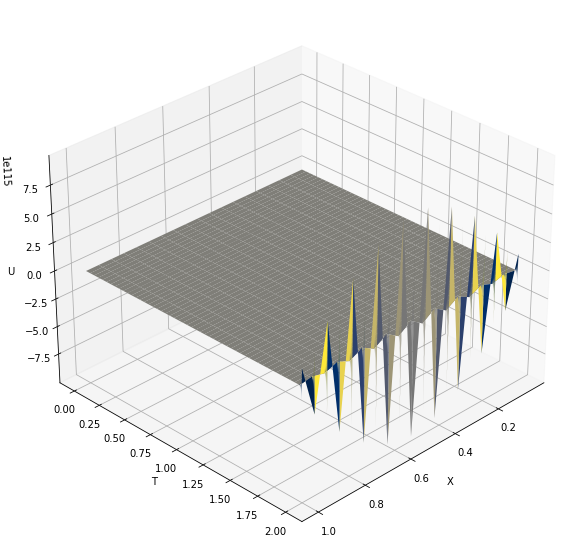

In [125]:
#Plotagem 3D da solução numérica
m = int(1/h - 1)
m_linha = int(lim_t/k)

x = np.arange(0, m)
t = np.arange(0, m_linha )

X, T = np.meshgrid(x,t)

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')

ax.plot_surface((-X + m)/m, (T*lim_t)/m_linha , U.flatten()[T*m + X], cmap = 'cividis')
ax.view_init(30, 45)
ax.set_xlabel('X')
ax.set_ylabel('T')
ax.set_zlabel('U')

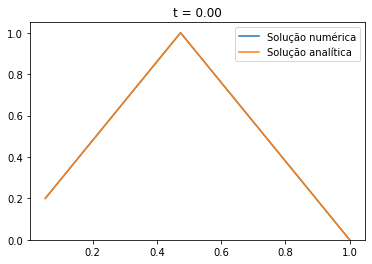

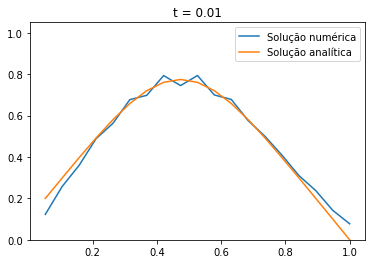

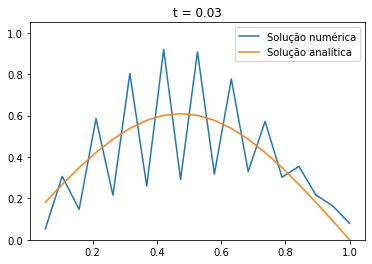

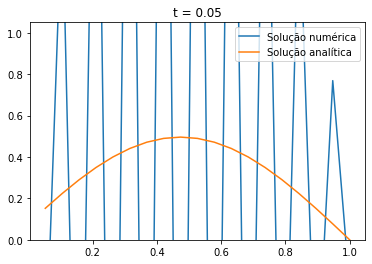

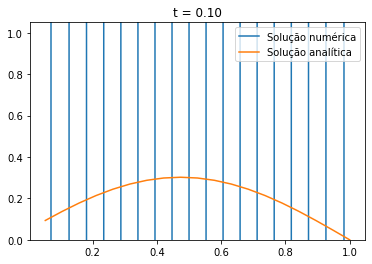

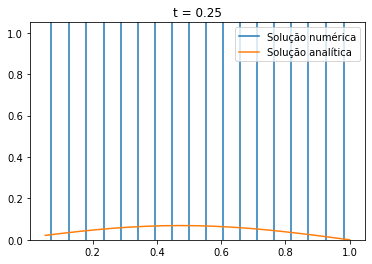

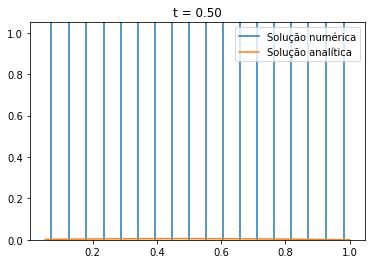

In [126]:
#Comparação da solução analítica com a solução numérica
m = int(1/h - 1)
m_linha = int(lim_t/k)
x = np.arange(0, m)

for i in [0, 0.01, 0.03, 0.05, 0.1, 0.25, 0.5]:
    u = u_analitica(x*h, i, lim_sum).flatten()
    
    fig, ax = plt.subplots()
    ax.plot((-x + m)/m, U.flatten()[int(i/k)*m + x])
    ax.plot((-x + m)/m, u[x])
    plt.title("t = %.2f" %i)
    ax.set_ylim([0, 1.05])    
    plt.legend(['Solução numérica', 'Solução analítica'])
    plt.show()


#### Crank-Nicolson

In [127]:
#Condições iniciais
h = 0.05
k = (5/11)*(h**2)
lim_t = 2
lim_sum = 100

#Solução numérica
U = U_cn(h, k, lim_t)
U

array([[0.00000000e+00, 1.00000000e-01, 2.00000000e-01, ...,
        4.00000000e-01, 3.00000000e-01, 2.00000000e-01],
       [3.20526331e-02, 1.05136852e-01, 2.00823220e-01, ...,
        3.99175636e-01, 2.94862965e-01, 1.67947338e-01],
       [4.63959751e-02, 1.14871069e-01, 2.03574568e-01, ...,
        3.96413677e-01, 2.85126784e-01, 1.53603650e-01],
       ...,
       [3.65571813e-10, 7.22142035e-10, 1.06093072e-09, ...,
        1.06093072e-09, 7.22142035e-10, 3.65571813e-10],
       [3.61502951e-10, 7.14104499e-10, 1.04912242e-09, ...,
        1.04912242e-09, 7.14104499e-10, 3.61502951e-10],
       [3.57479376e-10, 7.06156422e-10, 1.03744555e-09, ...,
        1.03744555e-09, 7.06156422e-10, 3.57479376e-10]])

Text(0.5, 0, 'U')

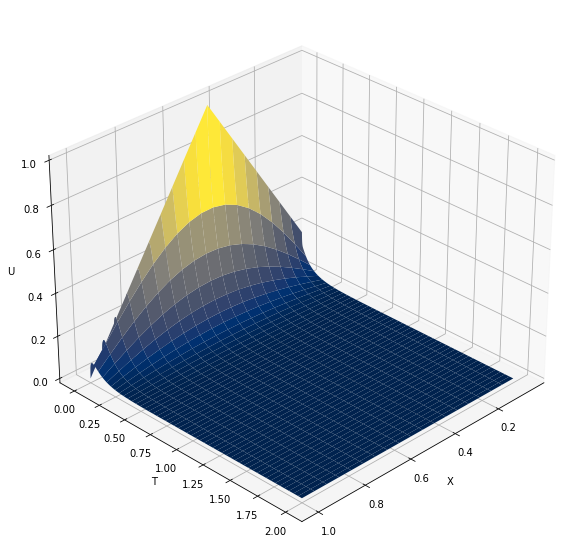

In [128]:
#Plotagem 3D da solução numérica
m = int(1/h - 1)
m_linha = int(lim_t/k)

x = np.arange(0, m)
t = np.arange(0, m_linha )

X, T = np.meshgrid(x,t)

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')

ax.plot_surface((-X + m)/m, (T*lim_t)/m_linha , U.flatten()[T*m + X], cmap = 'cividis')

ax.view_init(30, 45)
ax.set_xlabel('X')
ax.set_ylabel('T')
ax.set_zlabel('U')

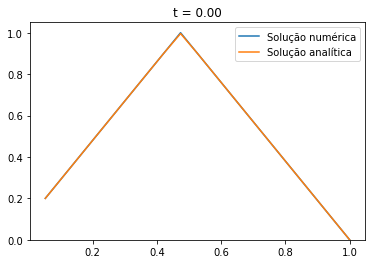

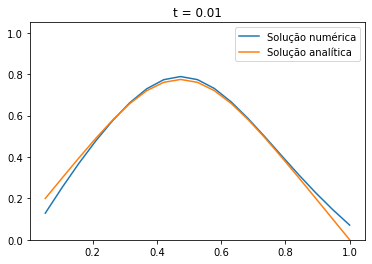

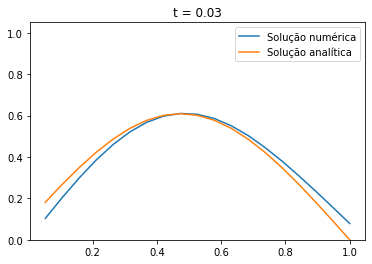

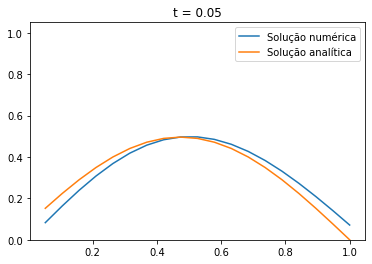

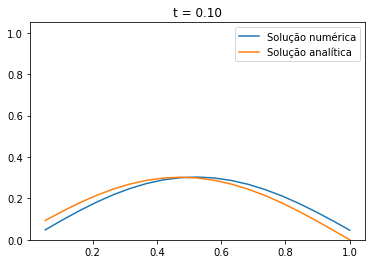

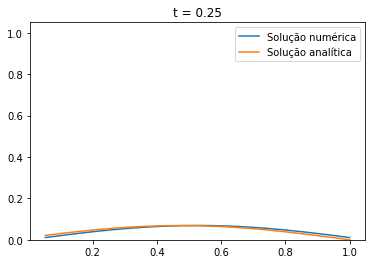

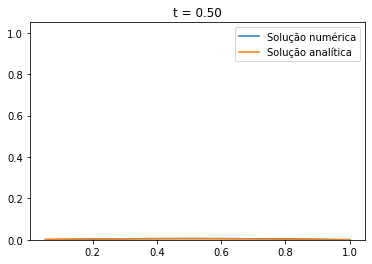

In [129]:
#Comparação da solução analítica com a solução numérica
m = int(1/h - 1)
m_linha = int(lim_t/k)
x = np.arange(0, m)

for i in [0, 0.01, 0.03, 0.05, 0.1, 0.25, 0.5]:
    u = u_analitica(x*h, i, lim_sum).flatten()
    
    fig, ax = plt.subplots()
    ax.plot((-x + m)/m, U.flatten()[int(i/k)*m + x])
    ax.plot((-x + m)/m, u[x])
    t = i
    plt.title("t = %.2f" %t)
    ax.set_ylim([0, 1.05])    
    plt.legend(['Solução numérica', 'Solução analítica'])
    plt.show()
    

## Parte 2: Verificar ordem de convergência dos métodos

### Método explícito:

$O(k + h^2) \Rightarrow k = Ch^2$

Como verificado na "Parte 1", um valor para a constate $C$ que garante a estabilidade do método é:

$C = \dfrac{5}{11}$

In [130]:
#Calculando a norma (2-norm) do erro para múltiplos valores de h e k
erro = []
valores_h = np.array([0.5, 0.1, 0.05, 0.01])
valores_k = (5/11)*(valores_h)**2
for h in [0.5, 0.1, 0.05, 0.01]:
    k = (5/11)*(h**2)
    aux = erro_explicito(h, k, lim_t, lim_sum)
    
    #Multiplicando a matriz pelos tamanhos dos passos  antes de calcular sua norma
    aux = h*k*aux
    erro.append(np.linalg.norm(aux))
    
valores_h = valores_h.tolist()
valores_k = valores_k.tolist()
erro

[0.01586954993108499,
 0.0004507319077525985,
 7.762861913929399e-05,
 1.3767018001411731e-06]

In [131]:
#Tabela dos valores para a análise da convergência
analise_conv = pd.DataFrame({'h': valores_h, 'k': valores_k, 'erro': erro})
analise_conv

,h,k,erro
0,0.50,0.113636,0.015870
1,0.10,0.004545,0.000451
2,0.05,0.001136,0.000078
3,0.01,0.000045,0.000001


Text(0, 0.5, 'erro')

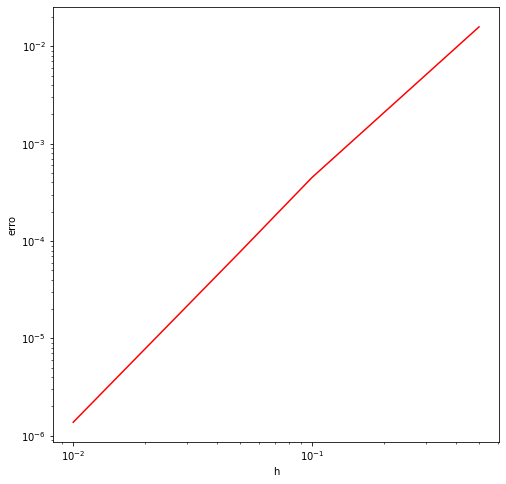

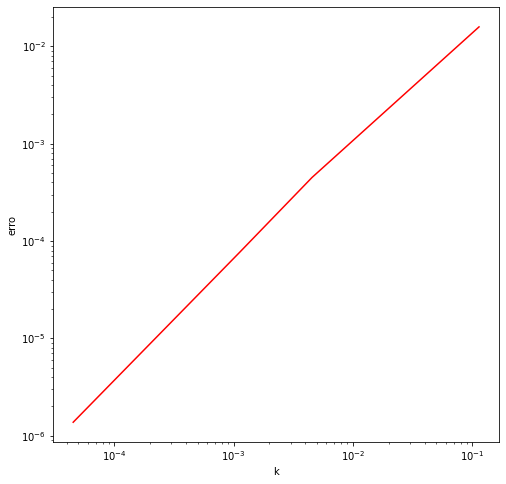

In [132]:
#Plotando figuras de convergência
analise_conv.plot.line(x = 'h', y = 'erro', loglog = True, legend = False, figsize = (8, 8), color = 'red')
plt.ylabel('erro')

analise_conv.plot.line(x = 'k', y = 'erro', loglog = True, legend = False, figsize = (8, 8), color = 'red')
plt.ylabel('erro')

### Método Crank-Nicolson:

$O(k^2 + h^2) \Rightarrow (k = Ch^2) \vee (k = Ch) $

Como se pode escolher livremente o espaçamento, por simplicidade escolheremos:

$C = 1$ para $k = Ch$, e

$C = \dfrac{5}{11}$ para $k = Ch^2$, para termos o mesmo espaçamento do método explícito

#### 1º Caso:  $k = h$

In [133]:
#Calculando a norma (2-norm) do erro para múltiplos valores de h e k
erro = []
valores_h = np.array([0.5, 0.1, 0.05, 0.01])
valores_k = valores_h
for h in [0.5, 0.1, 0.05, 0.01]:
    k = h
    aux = erro_cn(h, k, lim_t, lim_sum)
    
    #Multiplicando a matriz pelos tamanhos dos passos  antes de calcular sua norma    
    aux = h*k*aux
    erro.append(np.linalg.norm(aux))
    
valores_h = valores_h.tolist()
valores_k = valores_k.tolist()
erro

[0.0014574179600974637,
 0.013043725813228395,
 0.0033470729396198867,
 0.00013844995716815004]

In [134]:
#Tabela dos valores para a análise da convergência
analise_conv = pd.DataFrame({'h': valores_h, 'k': valores_k, 'erro': erro})
analise_conv

,h,k,erro
0,0.50,0.50,0.001457
1,0.10,0.10,0.013044
2,0.05,0.05,0.003347
3,0.01,0.01,0.000138


Text(0, 0.5, 'erro')

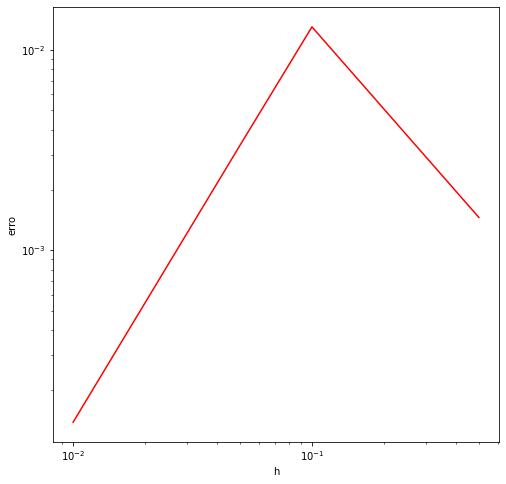

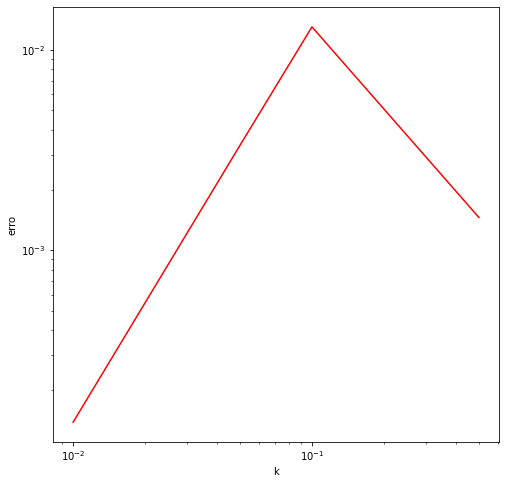

In [135]:
#Plotando figuras de convergência
analise_conv.plot.line(x = 'h', y = 'erro', loglog = True, legend = False, figsize = (8, 8), color = 'red')
plt.ylabel('erro')

analise_conv.plot.line(x = 'k', y = 'erro', loglog = True, legend = False, figsize = (8, 8), color = 'red')
plt.ylabel('erro')

#### 2º Caso:  $k = \dfrac{5}{11}h^2$

In [136]:
#Calculando a norma (2-norm) do erro para múltiplos valores de h e k
erro = []
valores_h = np.array([0.5, 0.1, 0.05, 0.01])
valores_k = (5/11)*(valores_h)**2
for h in [0.5, 0.1, 0.05, 0.01]:
    k = (5/11)*h**2
    aux = erro_cn(h, k, lim_t, lim_sum)
    
    #Multiplicando a matriz pelos tamanhos dos passos  antes de calcular sua norma
    aux = h*k*aux
    erro.append(np.linalg.norm(aux))
    
valores_h = valores_h.tolist()
valores_k = valores_k.tolist()
erro

[0.01586954993108499,
 0.00046695549509253247,
 7.851862389298077e-05,
 1.3774356891745903e-06]

In [137]:
#Tabela dos valores para a análise da convergência
analise_conv = pd.DataFrame({'h': valores_h, 'k': valores_k, 'erro': erro})
analise_conv

,h,k,erro
0,0.50,0.113636,0.015870
1,0.10,0.004545,0.000467
2,0.05,0.001136,0.000079
3,0.01,0.000045,0.000001


Text(0, 0.5, 'erro')

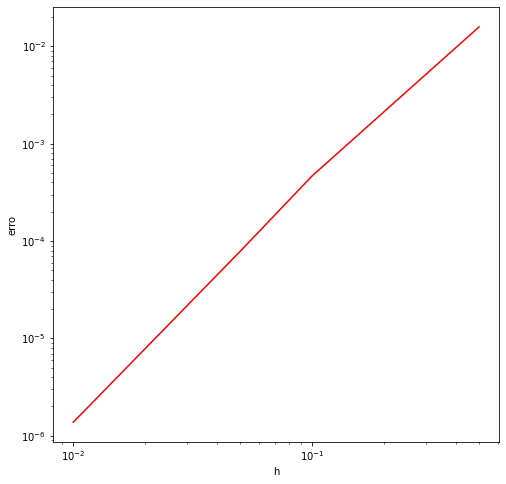

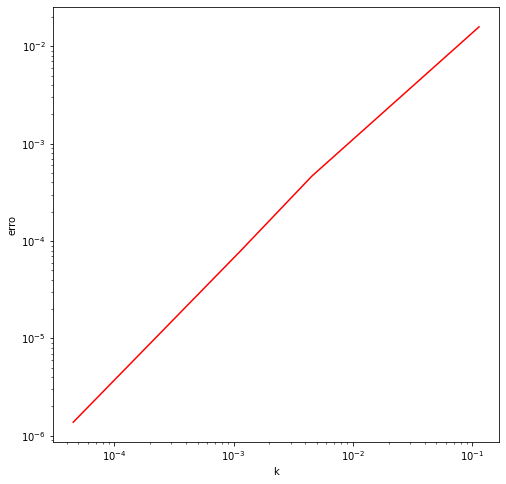

In [138]:
#Plotando figuras de convergência
analise_conv.plot.line(x = 'h', y = 'erro', loglog = True, legend = False, figsize = (8, 8), color = 'red')
plt.ylabel('erro')

analise_conv.plot.line(x = 'k', y = 'erro', loglog = True, legend = False, figsize = (8, 8), color = 'red')
plt.ylabel('erro')